# Exercise 3: MAP Classifier

In this assignment you will implement a few of the MAP classifiers learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this part of the exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw3.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw3.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw3.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw3.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Implement a Naive Bayeas Classifier based on Multi Normal distribution
1. Implement a Full Bayes Classifier based on Multi-Normal distribution
1. Implement a Distcrete Naive Bayes Classifier.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


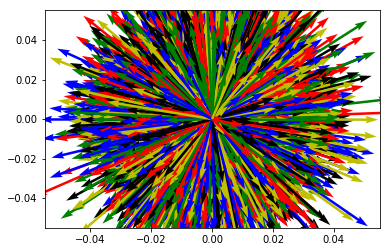

In [52]:
import matplotlib.pyplot as plt
import random

#section 4a-
A = []
for i in range(20000):
    V1= np.random.standard_normal(20)
    A.append(V1)

A = np.array(A) 

origin = [0], [0] # origin point

plt.quiver(*origin, A[:,0], A[:,1], color=['r','b','g','black','y'], scale=7)
plt.show()

In [60]:
# section 4b-
import time

# Gram matrix calculated by applying the kernel.
B = np.zeros(shape=(20000, 20000)) 

kernel_time_start = time.time()
for i in range(20000): 
    for j in range(20000): 
        x = np.inner(A[i], A[j]) + 1
        B[i][j] = x**2

kernel_time_end = time.time()

In [61]:
# section 4c-

def phi(x):
    p = np.array([1])
    length = len(x)
    for i in range(length):
        p = np.append(p, np.sqrt(2) * x[i])
    for i in range(length):
        p = np.append(p, x[i]**2)
    for i in range(length):
        j = i + 1
        while(j < length):
            p = np.append(p, np.sqrt(2) * x[i] * x[j])
            j+=1

    return p

"""
Maps in to dimension 231. 
"""

In [62]:
#section 4d,4e-

# Gram matrix calculated by the phi.
C = np.zeros(shape=(20000, 20000))

phi_time_start = time.time()
for i in range(20000):
    for j in range(20000):
        C[i][j] = np.inner(phi(A[i]), phi(A[j]))

phi_end = time.time()

In [63]:
#section 4f-

X = np.isclose(B, C)

#checking if the whole matrix is full of True.
flag = True
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        flag = flag & X[i][j]

print(flag)

True


In [64]:
#section 4g-

print("time of calculating the matrix using the kernel is:")
kernel_time = kernel_time_end - kernel_time_start
print(kernel_time)


print("---------------------------------------------")
print("time of calculating the matrix using the phi is:")
phi_time = phi_end - phi_time_start
print(phi_time)

time of calculating the matrix using the kernel is:
0.4208698272705078
---------------------------------------------
time of calculating the matrix using the phi is:
544.0505244731903


In [58]:
"""
After comparing the time it took to calculate the Gram matrix with the kernel with the time it took to calculate the Gram matrix
with the phi we observe that it is clearly more time afficiant to calculate the Gram matrix by applying the kernel we have 
on the vectors and not by mapping the vectors to higher dimentions and then make the dot product on those mapping images.

"""

'\nAfter comparing the time it took to calculate the Gram matrix with the kernel with the time it took to calculate the Gram matrix\nwith the phi we observe that it is clearly more time afficiant to calculate the Gram matrix by applying the kernel we have \non the vectors and not by mapping the vectors to higher dimentions and then make the dot product on those mapping images.\n\n'